In [1]:
from boundmixofgaussians import findpeak, compute_sum, compute_grad
import numpy as np
np.set_printoptions(suppress=True,precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
from GPAdversarialBound import getallchanges, zeromean_gaussian, getbound, AdversBound, compute_bounds
from GPAdversarialBound.logistic import get_logistic_result
from GPAdversarialDatasets import getMNISTexample, getbankexample, getcreditexample, getspamexample,getsynthexample
import GPy
# from GPAdversarialBound.test import testing
# testing()

# System Testing

In [2]:
Xtrain = np.array([[0.5,0.5]])#np.random.rand(,3)
Ytrain = np.array([[1]]).T#(np.sum(Xtrain,1)>2.5).astype(int)[:,None]
Xtest = np.random.rand(20,3)
Ytest = (np.sum(Xtest,1)>2.5).astype(int)[:,None]

#k = GPy.kern.Exponential(Xtrain.shape[1])
k = GPy.kern.RBF(Xtrain.shape[1])
results, m, _, accuracy, abCI,debug = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,depth=1, sparse=None, ls=0.5, v=5, sigma=0.0001,nstep_per_dim=5,k=k)
assert np.abs(np.max(results[0])-(debug['alpha'][0]*5*(1-np.exp(-0.5**2/(2*0.5**2)))))<1e-5

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


not sparse...
Starting...
..

In [3]:
Xtrain = np.array([[0.5,0.5]])#np.random.rand(,3)
Ytrain = np.array([[1]]).T#(np.sum(Xtrain,1)>2.5).astype(int)[:,None]
Xtest = np.random.rand(20,3)
Ytest = (np.sum(Xtest,1)>2.5).astype(int)[:,None]

#k = GPy.kern.Exponential(Xtrain.shape[1])
k = GPy.kern.RBF(Xtrain.shape[1])
results, m, _, accuracy, abCI,debug = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,depth=1, sparse=None, ls=0.5, v=5, sigma=0.0001,nstep_per_dim=1,k=k)
assert np.abs(np.max(results[0])-(debug['alpha'][0]*5*(1-np.exp(-0.5**2/(2*0.5**2)))))<1e-5

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


not sparse...
Starting...
..

In [4]:
import GPy

Xtrain = np.array([[0.5,0.5],[0.3,0.3]])#np.random.rand(,3)

Ytrain = np.array([[1,1]]).T#(np.sum(Xtrain,1)>2.5).astype(int)[:,None]
#Xtrain = np.random.rand(20,2)
#Ytrain = (np.random.rand(20)+np.sum(Xtrain,1)>2.5).astype(int)[:,None] 
Xtest = np.random.rand(20,2)
Ytest = (np.sum(Xtest,1)>2.5).astype(int)[:,None]

for k,kname in zip([GPy.kern.Exponential(Xtrain.shape[1]),GPy.kern.RBF(Xtrain.shape[1])],['Exp','EQ']):
    v = 5
    ls = 2.0
    results, m, _, accuracy, abCI,debug = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,depth=1, sparse=None, ls=ls, v=v, sigma=0.0001,nstep_per_dim=30,k=k)
    x = np.linspace(0,1,100)
    if kname == 'Exp':
        vals = (debug['alpha'][None,:]*v*np.exp(-np.abs(x[:,None]-debug['abXs'][:,0])/(ls))).T
    if kname == 'EQ':
        vals = (debug['alpha'][None,:]*v*np.exp(-(x[:,None]-debug['abXs'][:,0])**2/(2*ls**2))).T
       
    sumvals = np.sum(vals,0)
    empirical_change = np.max(sumvals)-np.min(sumvals)
    theoretical_bound = [res[0][-1] for res in results][0][0]
    assert empirical_change<theoretical_bound
    break

reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


not sparse...
Starting...
..

In [5]:
theoretical_bound,empirical_change,theoretical_bound/empirical_change

(0.3401446895402089, 0.3238746060292328, 1.0502357492933778)

reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


[[ 0.253 -0.253]]
not sparse...
Starting...
..[[ 0.253 -0.253]]


reconstraining parameters gp_classification.Exponential.variance


not sparse...


reconstraining parameters gp_classification.Exponential.variance


Starting...
..

reconstraining parameters gp_classification.rbf.variance


[[ 0.386 -0.386]]
not sparse...


reconstraining parameters gp_classification.rbf.variance


Starting...
..[[ 0.591 -0.591]]


reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance


[[ 0.591 -0.591]]


reconstraining parameters gp_classification.rbf.variance


not sparse...
Starting...
..[[ 0.779 -0.779]]


reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


[[ 0.253 -0.253]]
not sparse...
Starting...
..[[ 0.253 -0.253]]


reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


[[ 0.386 -0.386]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


[[ 0.591 -0.591]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


[[ 0.591 -0.591]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


[[ 0.779 -0.779]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


[[ 0.253 -0.253]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


[[ 0.253 -0.253]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


[[ 0.386 -0.386]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters gp_classification.Exponential.variance


[[ 0.591 -0.591]]
not sparse...
Starting...
..

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters gp_classification.rbf.variance


[[ 0.591 -0.591]]
not sparse...
Starting...
..[[ 0.779 -0.779]]


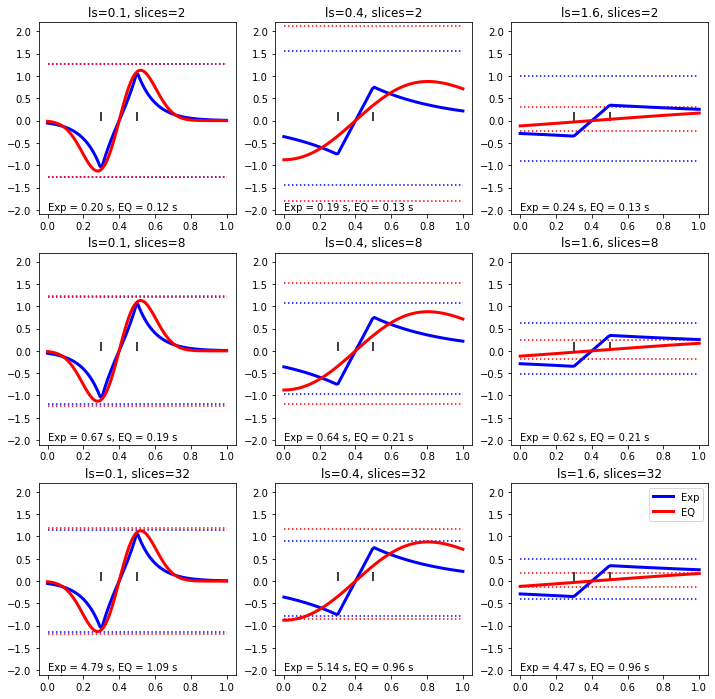

In [26]:
import GPy
from time import time

Xtrain = np.array([[0.5,0.5],[0.3,0.5]])#np.random.rand(,3)
Ytrain = np.array([[1,0]]).T#(np.sum(Xtrain,1)>2.5).astype(int)[:,None]
#Xtrain = np.random.rand(20,2)
#Ytrain = (np.random.rand(20)+np.sum(Xtrain,1)>2.5).astype(int)[:,None] 
Xtest = np.random.rand(20,2)
Ytest = (np.sum(Xtest,1)>2.5).astype(int)[:,None]
figi=0
plt.figure(figsize=[12,12])
for nstep_per_dim in [2,8,32]:
    for ls in [0.1,0.4,1.6]:
        figi+=1
        plt.subplot(3,3,figi)
        totaltimes = []
        for k,kname,col in zip([GPy.kern.Exponential(Xtrain.shape[1]),GPy.kern.RBF(Xtrain.shape[1])],['Exp','EQ'],['b','r']):

            v = 5
            #ls = 0.3
            starttime = time()
            results, m, _, accuracy, abCI,debug = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,depth=1, sparse=None, ls=ls, v=v, sigma=0.0001,nstep_per_dim=nstep_per_dim,k=k)
            totaltimes.append(time() - starttime)
            x = np.linspace(0,1,100)
            if kname == 'Exp':
                vals = (debug['alpha'][None,:]*v*np.exp(-np.abs(x[:,None]-debug['abXs'][:,0])/(ls))).T
            if kname == 'EQ':
                vals = (debug['alpha'][None,:]*v*np.exp(-(x[:,None]-debug['abXs'][:,0])**2/(2*ls**2))).T

            sumvals = np.sum(vals,0)
            empirical_change = np.max(sumvals)-np.min(sumvals)
            theoretical_bound = [res[0][-1] for res in results][0][0]

            plt.plot(x,np.sum(vals,0),'-'+col,lw=3,label=kname)
            #plt.plot(x,vals.T,'-'+col)
            print(debug['alpha'][None,:])
            plt.hlines([np.mean(sumvals)-theoretical_bound/2,np.mean(sumvals)+theoretical_bound/2],0,1,linestyles=':',colors=col)
            pred_mean, pred_var = m.predict_noiseless(np.c_[x[:,None],np.full(100,0.5)])
            #plt.plot(x,pred_mean[:,0],'g--',lw=5)
            #plt.plot(x,pred_mean[:,0]+np.sqrt(pred_var[:,0]),':'+col,lw=1)
            #plt.plot(x,pred_mean[:,0]-np.sqrt(pred_var[:,0]),':'+col,lw=1)
        plt.text(0,-2,"Exp = %0.2f s, EQ = %0.2f s" % (totaltimes[0],totaltimes[1]))

        plt.vlines(Xtrain[:,0],0,0.2,color='black')
        if figi == 9: plt.legend()
        plt.title('ls=%0.1f, slices=%d'%(ls,nstep_per_dim))
        #plt.ylabel('Latent function mean')
        #plt.xlabel('Input location along first axis')
        plt.ylim([-2.1,2.2])
plt.savefig('kernel_examples.pdf')

In [6]:
!cp kernel_examples.pdf /home/mike/Documents/Research/SheffieldMLpublications/publications/adversarialGP/tex/machinelearning

## MNIST Demo

In [2]:
trainingN = 100
testN = 200
fullX,Y = getMNISTexample(scalingfactor=4,Ntraining=trainingN+testN,splittype='35') #4
keep = np.max(fullX,0)>50 #150
X = fullX[:,keep]
X=X-np.min(X,0)
X=X/np.max(X,0)
X = X*1.0
Y = Y*1.0
Y[Y==0]=-1
Xtest = X[trainingN:,:]
Ytest = Y[trainingN:,:]
Xtrain = X[0:trainingN,:]
Ytrain = Y[0:trainingN,:]

Comparing 3 vs 5


In [4]:
from time import time
for k,kname in zip([GPy.kern.Exponential(Xtrain.shape[1]),GPy.kern.RBF(Xtrain.shape[1])],['Exp','EQ']):
    starttime = time()
    results, m, _, accuracy, abCI,debug = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,depth=1, ls=4, v=3, sparse=6, sigma=0.0001,nstep_per_dim=15,k=k)
    print("---"+kname+"---")
    print(time()-starttime)
    print(accuracy)
    print(np.diff(abCI))
    print(np.sort(np.array([r[0][-1] for r in results])[:,0]))
    print("------")

reconstraining parameters gp_classification.Exponential.variance
reconstraining parameters sparse_gp.rbf.variance


Sparse...
Starting...
...................................---Exp---
434.8639404773712
0.74
[3.182]
[4.458 4.52  4.621 4.643 4.662 4.795 4.811 4.835 4.883 4.939 4.943 4.947
 4.948 4.982 4.985 4.996 5.006 5.017 5.029 5.052 5.061 5.067 5.095 5.156
 5.178 5.178 5.225 5.23  5.309 5.382 5.437 5.449 5.535 5.627 5.744]
------


reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance


Sparse...
Starting...
...................................---EQ---
63.34607219696045
0.765
[2.439]
[0.713 0.762 0.764 0.805 0.805 0.83  0.85  0.869 0.883 0.911 0.915 0.932
 0.967 0.974 0.983 1.002 1.01  1.033 1.038 1.041 1.056 1.056 1.078 1.085
 1.111 1.121 1.124 1.14  1.187 1.237 1.276 1.321 1.343 1.369 1.88 ]
------


# Notes on the construction of the approximation

First optimised the weights and lengthscales...

In [32]:
import numpy as np
from scipy.optimize import minimize
d = 4
gridstart=np.array([0]*d)
gridend=np.array([10]*d)

max_dist = np.sqrt(np.sum((gridend-gridstart)**2))

ds = np.linspace(0,max_dist,10000)
ls = 1.0
num = 7
def fn(X):
    ws = (X[:num])
    ws = ws / np.sum(ws)
    lens = X[num:]
    s = np.zeros_like(ds)

    for w,ln in zip(ws,lens):
        s = s + w * np.exp(-(ds**2)/(2*ln**2))

    r = np.sum((s-np.exp(-ds/ls))**2)
    return r

ws = np.exp(np.linspace(np.log(max_dist),0,num))
ws = ws/np.sum(ws)
x0 = np.r_[ws,np.exp(np.linspace(0,np.log(max_dist),num))]
print(x0)
res = minimize(fn,x0,bounds=[(1e-10,1000)]*len(x0),options={'ftol':1e-20,'gtol':1e-20,'maxiter':1e4})

[ 0.405  0.246  0.149  0.091  0.055  0.033  0.02   1.     1.648  2.714
  4.472  7.368 12.139 20.   ]


In [33]:
x = res.x
ws = x[:num]
ws = ws / np.sum(ws)
lens = x[num:]
reorder = np.argsort(lens**2)
lens = lens[reorder]
ws = ws[reorder]
print(lens)
print(ws)

(array([ 56.526, 115.704, 189.349, 151.374,  98.024, 216.327,   0.384]),
 array([ 0.038,  0.163,  0.919,  1.846,  0.919,  0.424, 17.079]),
 array([], dtype=float64))

# Actual numbers used

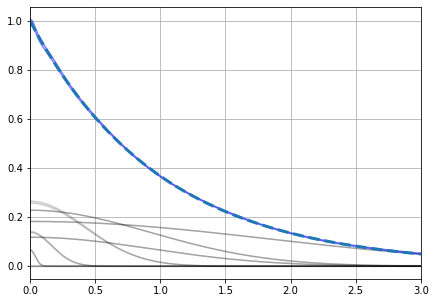

In [12]:
import numpy as np
hws = np.array([0.06829387, 0.13979143, 0.26136302, 0.11843095, 0.22876908,0.18288816, 0.00046348])
lws = hws.copy()
lens = np.array([ 0.038469  ,  0.16337993,  0.42350206,  0.91900753,  0.91912203, 1.84561768, 17.07884635])
import matplotlib.pyplot as plt
d = 4
gridstart=np.array([0]*d)
gridend=np.array([10]*d)
max_dist = np.sqrt(np.sum((gridend-gridstart)**2))
ds = np.linspace(0,max_dist,10000)
ls = 1.0
num = 7

plt.figure(figsize=[7,5])

lws[0]-= 0.003
lws[1]-= 0.0025
lws[2]-= 0.0035
lws[-1]-=0.0013
hws[1]+= 0.002
hws[2]+= 0.004
hws[-1]+=0.0018
#lws[:]-=0.0003
for ws,lab in zip([hws,lws],['upper','lower']):
    s = np.zeros_like(d)
    for w,ln in zip(ws,lens):
        s = s + w * np.exp(-(ds**2)/(2*ln**2))
    
        plt.plot(ds,w * np.exp(-(ds**2)/(2*ln**2)),'-k',alpha=0.2)
    plt.plot(ds,s,'b-',alpha=0.5,label=lab)#np.exp(-ds/ls))
    #plt.plot(ds,s-np.exp(-ds/ls))
    #print(np.min(s-np.exp(-ds/ls)),np.max(s-np.exp(-ds/ls)))
plt.grid()

plt.plot(ds,np.exp(-ds/ls),'--',lw=3)
#plt.legend()
plt.xlim([0,3])

plt.savefig('kernel_approx.pdf')

In [13]:
!cp kernel_approx.pdf /home/mike/Documents/Research/SheffieldMLpublications/publications/adversarialGP/tex/machinelearning